[Exploratory_Data_Analysis](#Exploratory_Data_Analysis)

 * [1 Analyzing Data's Stats](#1_Analyzing_Datas_Stats)
   * [1a. Data Tables](#1a.Data_Tables)
   * [1b. Statistcal_Inference](#1b.Statistical_Inference)
   
   
 * [2 Data Relationships](#2_Data_Relationships)
   * [2.1_Heatmap](#2.1_Heatmap)
   * [2.2_Pair_Plot](#2.2_Pair_Plot)
   
 * [3 Feature Selection And Engineering](#3_Feature_Selection_And_Engineering)


# Exploratory Data Analysis <a id='Exploratory_Data_Analysis'></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv('datasets/Clean_Pandemic_Taxi_Data.csv', index_col=0)
df.head()

,VendorID,passenger_count,trip_distance,RatecodeID,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,...,Brooklyn_PU,Manhattan_PU,Queens_PU,Staten_Island_PU,Bronx_DO,Brooklyn_DO,Manhattan_DO,Queens_DO,Staten_Island_DO,Mins_In_Ride
2020-01-01 00:00:00,1.693601,1.687510,2.408714,0.998782,11.389942,1.219202,0.5,1.887437,0.000910,0.3,...,0.017785,0.963781,0.016242,0.0,0.009177,0.041660,0.917411,0.031752,0.0,13.420050
2020-01-01 01:00:00,1.697895,1.683354,2.564234,0.998770,11.581830,1.182341,0.5,1.958635,0.000405,0.3,...,0.043406,0.935325,0.018230,0.0,0.010851,0.064964,0.881357,0.042827,0.0,13.356097
2020-01-01 02:00:00,1.688215,1.647092,2.690488,0.998540,11.325833,1.195151,0.5,1.940590,0.001363,0.3,...,0.053938,0.916782,0.025468,0.0,0.012166,0.083786,0.847757,0.056290,0.0,12.094755
2020-01-01 03:00:00,1.698586,1.630557,2.791689,0.999326,11.313673,1.182027,0.5,1.848462,0.001200,0.3,...,0.043444,0.925123,0.027952,0.0,0.014369,0.096767,0.820947,0.067916,0.0,11.545077
2020-01-01 04:00:00,1.712146,1.637443,2.921626,0.999817,11.491224,1.137763,0.5,1.657045,0.001534,0.3,...,0.045114,0.916712,0.036164,0.0,0.014429,0.109954,0.783196,0.092420,0.0,11.273529


In [4]:
len(df)

4368

# 1. Analyzing Data's Stats <a id='1_Analyzing_Datas_Stats'></a>

# 1a. Data Tables <a id='1a.Data_Tables'></a>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4368 entries, 2020-01-01 00:00:00 to 2020-06-30 23:00:00
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               4367 non-null   float64
 1   passenger_count        4367 non-null   float64
 2   trip_distance          4367 non-null   float64
 3   RatecodeID             4367 non-null   float64
 4   fare_amount            4367 non-null   float64
 5   extra                  4367 non-null   float64
 6   mta_tax                4367 non-null   float64
 7   tip_amount             4367 non-null   float64
 8   tolls_amount           4367 non-null   float64
 9   improvement_surcharge  4367 non-null   float64
 10  total_amount           4366 non-null   float64
 11  congestion_surcharge   4367 non-null   float64
 12  Bronx_PU               4367 non-null   float64
 13  Brooklyn_PU            4367 non-null   float64
 14  Manhattan_PU           4367 

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,4367.0,1.521425,2.077882e-01,0.281250,1.484356,1.572704,1.659490,1.809524
passenger_count,4367.0,1.308074,2.310822e-01,0.218750,1.217668,1.336683,1.469897,2.000000
trip_distance,4367.0,2.586941,8.149919e-01,1.677661,2.104912,2.380163,2.817782,8.210676
RatecodeID,4367.0,0.934164,1.156146e-01,0.187500,0.938665,0.973759,0.995850,1.000720
fare_amount,4367.0,10.666862,2.091754e+00,8.020914,9.621688,10.105864,10.848695,26.951875
extra,4367.0,1.072678,3.382215e-01,0.094595,0.825652,0.950000,1.245399,2.248453
mta_tax,4367.0,0.500000,0.000000e+00,0.500000,0.500000,0.500000,0.500000,0.500000
tip_amount,4367.0,1.459129,3.798792e-01,0.068235,1.270736,1.510107,1.725456,2.222693
tolls_amount,4367.0,0.001824,6.604569e-03,0.000000,0.000000,0.000000,0.000940,0.140000
improvement_surcharge,4367.0,0.300000,3.614072e-14,0.300000,0.300000,0.300000,0.300000,0.300000


/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matpl

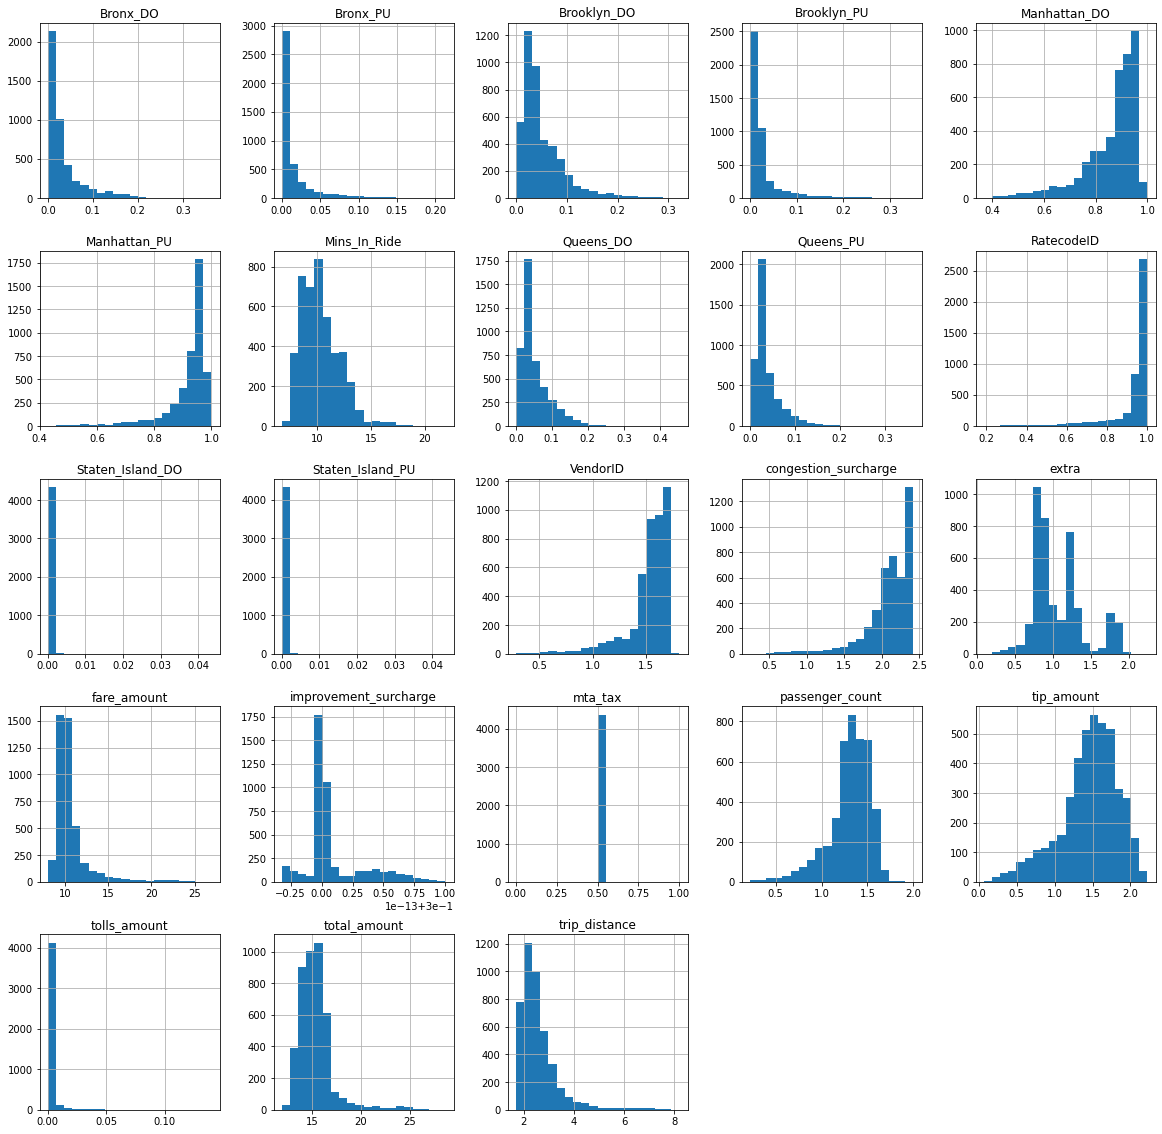

In [7]:
hist = df.hist(bins = 20, figsize=(20, 20))

In [8]:
num_cols = df.describe().columns
num_cols

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'Bronx_PU', 'Brooklyn_PU', 'Manhattan_PU', 'Queens_PU',
       'Staten_Island_PU', 'Bronx_DO', 'Brooklyn_DO', 'Manhattan_DO',
       'Queens_DO', 'Staten_Island_DO', 'Mins_In_Ride'],
      dtype='object')

# 1b. Statistical Inference<a id ='1b.Statistical_Inference'></a>

Null Hypothesis: The pickup area of the pickup location does not affect how much money someone makes. 

Alternative Hypothesis: The pickup area of the pickup location does affect how much money someone makes

In [9]:
# First is to check whether the data for 'total_amount' is normally distributed.
total_amount_normal = stats.normaltest(df['total_amount'])
total_amount_normal
# A p-value of 0.0 tells us that it is not normally distributed.

NormaltestResult(statistic=nan, pvalue=nan)

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


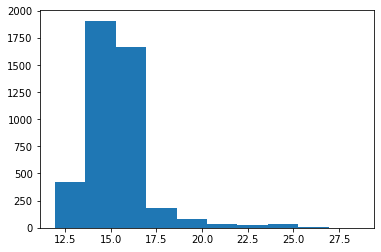

In [10]:
# The histrogram provides further proof that the data is not normally distributed
plt.hist(df['total_amount'], bins=10)
plt.show()

# 2. Data Relationships <a id='2_Data_Relationships'></a>

# 2.1 Heatmap<a id='2.1_Heatmap'></a>

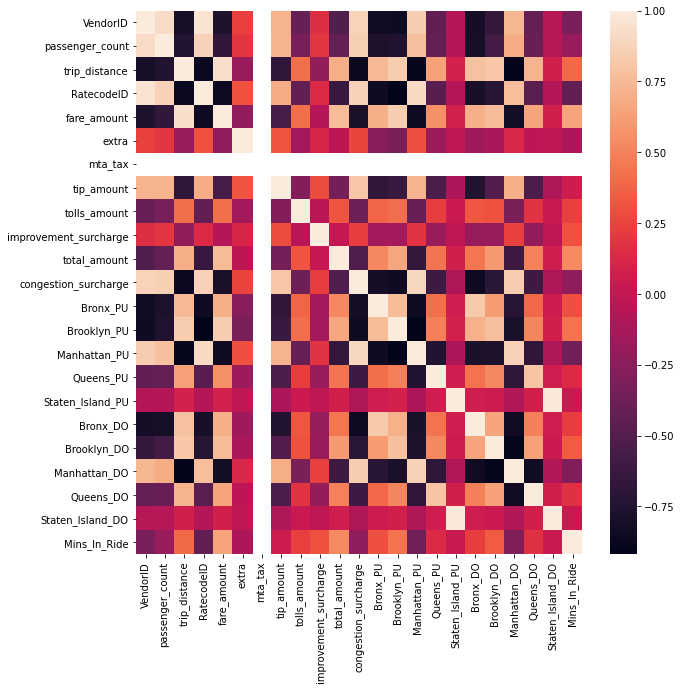

In [11]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr())
plt.yticks(rotation=0)
plt.show()

With this heatmap I can begin to see that trip_distance, fare_amount, tolls_amount, tip_amount, Queens_PU have close to +1 correlations with total_amount.

# 3. Feature Selection And Engineering<a id='3_Feature_Selection_And_Engineering'></a>

In [12]:
# The feauters that correlate our target variable the most appears to be 'trip_distance', 'fare_amount', 
# 'tolls_amount', 'tip_amount', 'Queens_PU' and Mins_In_Ride

# The last 10 features in the main dataframe will also be used as these 
# are one-hot enocoded to represent which borough they were picked up in 
# and which they were dropped off in. In addition, we saw how out 
# permutation test proved that pick up locations affected our total_amount

c = list(df.columns[-10:])
o = ['total_amount', 'trip_distance', 'fare_amount', 'tolls_amount', 'tip_amount']
o += c
o

['total_amount',
 'trip_distance',
 'fare_amount',
 'tolls_amount',
 'tip_amount',
 'Brooklyn_PU',
 'Manhattan_PU',
 'Queens_PU',
 'Staten_Island_PU',
 'Bronx_DO',
 'Brooklyn_DO',
 'Manhattan_DO',
 'Queens_DO',
 'Staten_Island_DO',
 'Mins_In_Ride']

In [13]:
crucial_elements = df[o]
crucial_elements.head()

,total_amount,trip_distance,fare_amount,tolls_amount,tip_amount,Brooklyn_PU,Manhattan_PU,Queens_PU,Staten_Island_PU,Bronx_DO,Brooklyn_DO,Manhattan_DO,Queens_DO,Staten_Island_DO,Mins_In_Ride
2020-01-01 00:00:00,NaN,2.408714,11.389942,0.000910,1.887437,0.017785,0.963781,0.016242,0.0,0.009177,0.041660,0.917411,0.031752,0.0,13.420050
2020-01-01 01:00:00,16.936198,2.564234,11.581830,0.000405,1.958635,0.043406,0.935325,0.018230,0.0,0.010851,0.064964,0.881357,0.042827,0.0,13.356097
2020-01-01 02:00:00,17.148780,2.690488,11.325833,0.001363,1.940590,0.053938,0.916782,0.025468,0.0,0.012166,0.083786,0.847757,0.056290,0.0,12.094755
2020-01-01 03:00:00,16.830250,2.791689,11.313673,0.001200,1.848462,0.043444,0.925123,0.027952,0.0,0.014369,0.096767,0.820947,0.067916,0.0,11.545077
2020-01-01 04:00:00,16.732711,2.921626,11.491224,0.001534,1.657045,0.045114,0.916712,0.036164,0.0,0.014429,0.109954,0.783196,0.092420,0.0,11.273529


In [14]:
crucial_elements.to_csv('./datasets/Crucial_Elements.csv')

● Are there variables that are particularly significant in terms of explaining the answer to your project question?

    * It appears that I some variables that will be able to help in finding out what factors lead a taxi driver into maximizing their daily earnings 

● Are there significant differences between subgroups in your data that may be relevant to your project aim?

    * Some significant differences I noticed involved studying how permutated data from the mean of the Borough pick up location varied from the popoulation mean. It showed that they were different means.

● Are there strong correlations between pairs of independent variables or between an independent and a dependent variable?

    * 'total_amount', 'trip_distance', 'fare_amount', 'tolls_amount', 'tip_amount' are strong independent variables to total_amount as they provide the highest correlation when compared to total_amount.

● What are the most appropriate tests to use to analyze these relationships?

    * Since the data does not appear to be normal in any of these variables, then performing a permutation test would be a good way to test out outliers and null hypothesis'